In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed

In [2]:
targetdir = '/Users/aimachine/Downloads/LineScanTest/'

Actinimage = '/Users/aimachine/Downloads/LineScanTest/Ch1LineScan_C1-20180618_mtmgLA_confiner_after1_stack_w1CSU BF-1TrackID1.tif'

Membraneimage = '/Users/aimachine/Downloads/LineScanTest/Ch2LineScan_C1-20180618_mtmgLA_confiner_after1_stack_w1CSU BF-1TrackID1.tif'

#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 10

#Symmetric psf as input (micrometers)
psf = 0.17
showaftertime = 100
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 80 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)


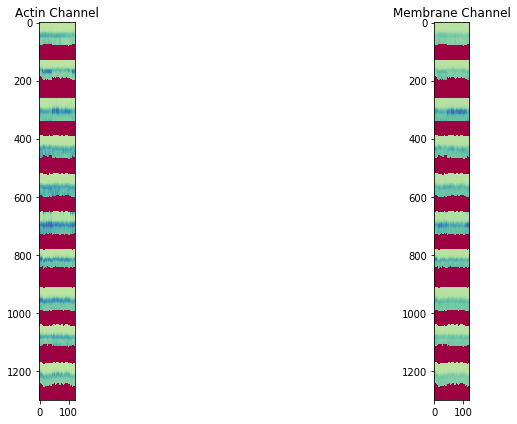

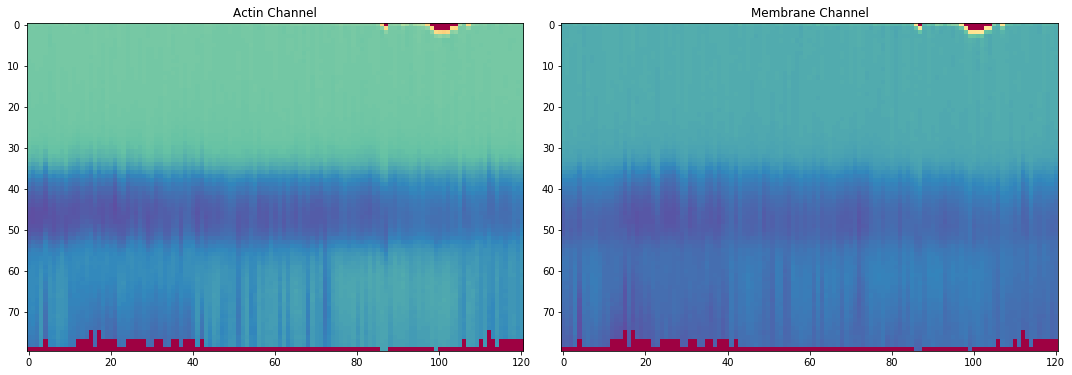

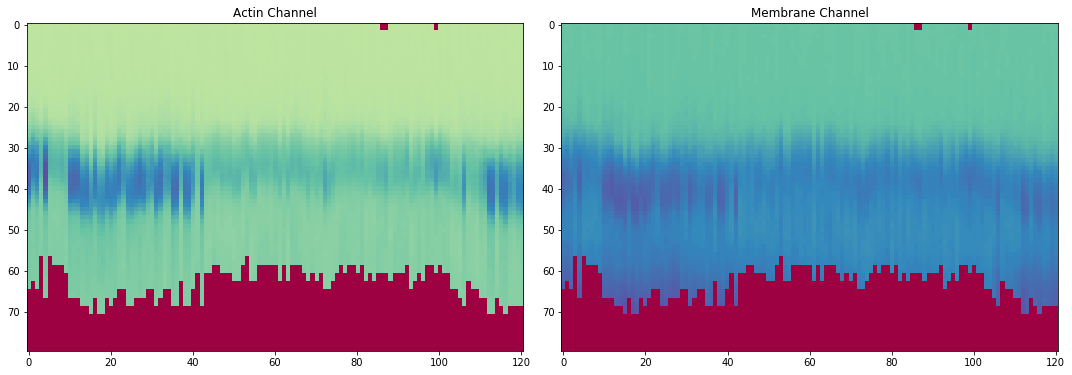

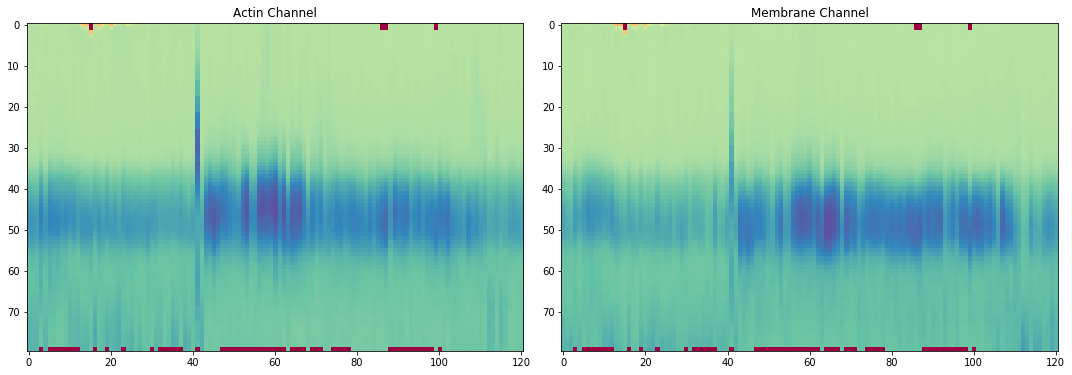

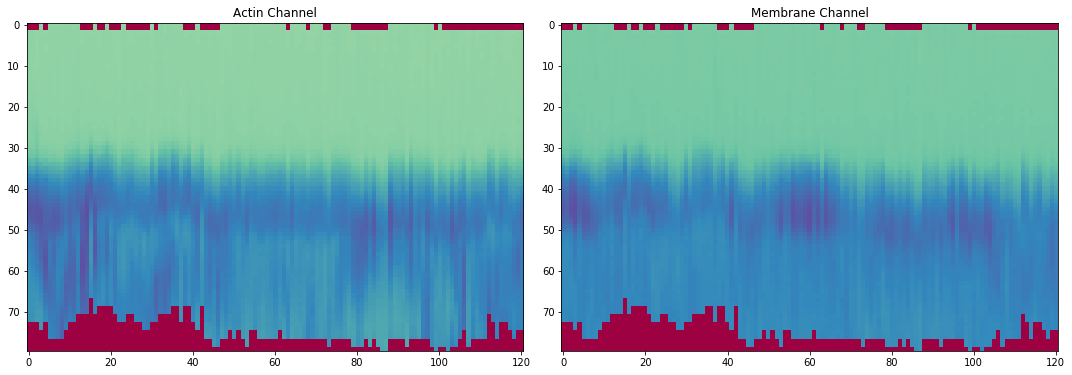

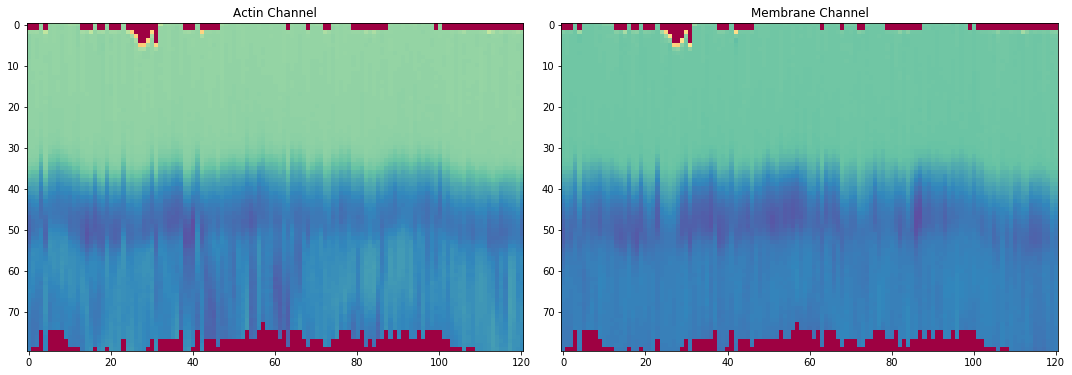

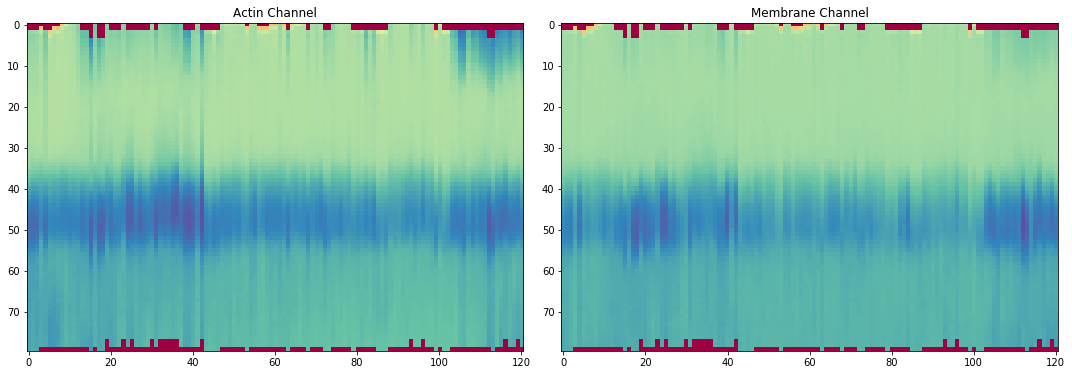

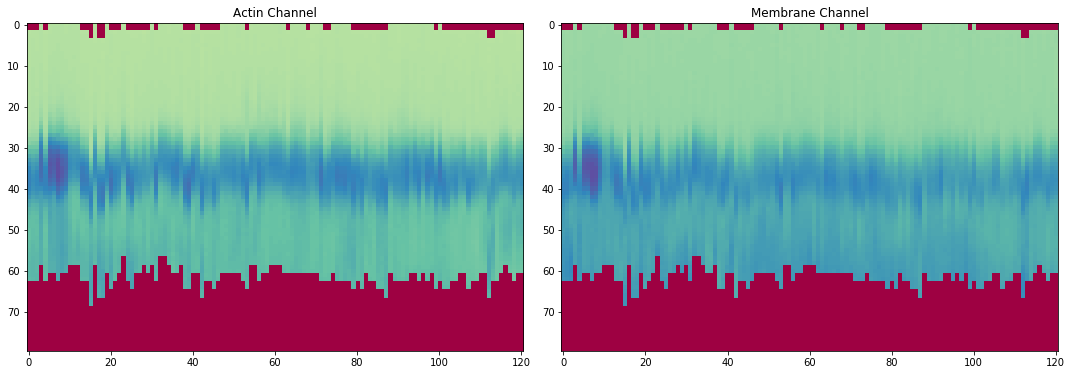

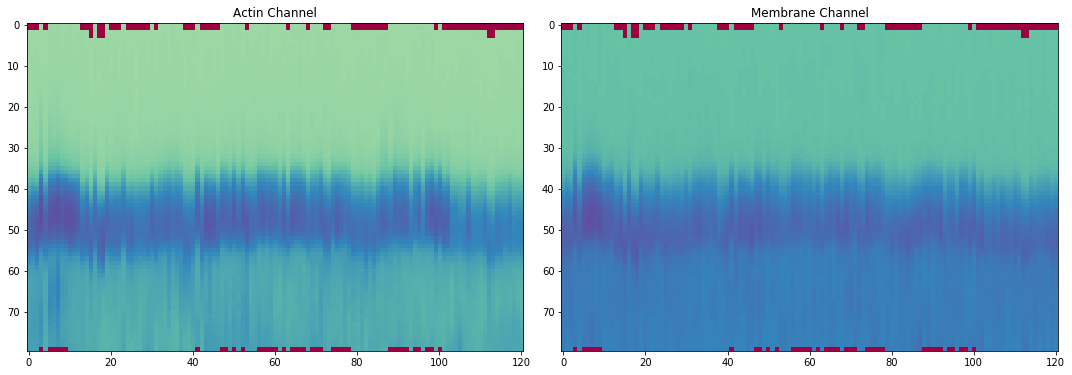

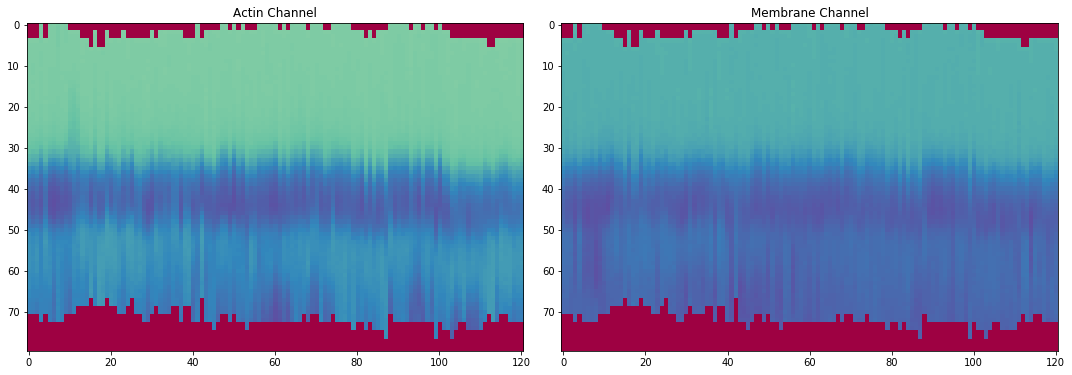

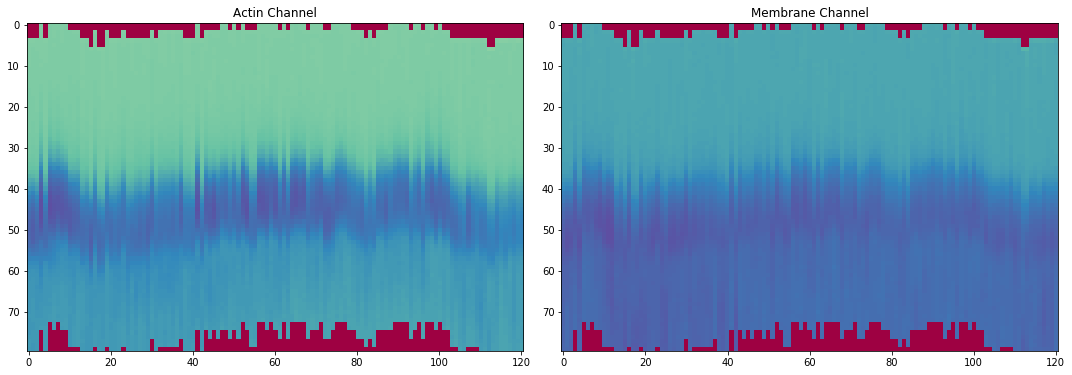

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)

doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock,:]
   blockMembrane = Membrane[i:i + singleblock,:]
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)


block id 1
Time point: 0
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 19.20952159   0.59731561   4.8543245  117.54299899]
Actin Fit: [ 8.62909473e+04  1.25743646e+01  5.01849873e+00 -2.62059771e+03]


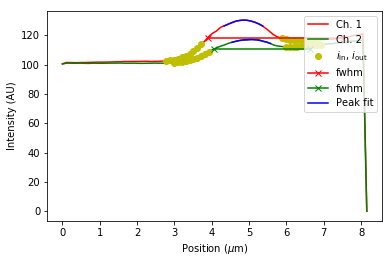

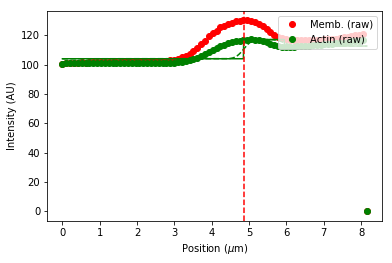

Thickness, center position of the cortical actin , cortical actin intensity (from fit) 1.0909011805698898 5.399775088783842 117.12370249400101
Time point: 100
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 7.65434692e+05  2.29807718e+01  4.88701679e+00 -1.31645829e+04]
Actin Fit: [ 12.32972363   0.66119247   5.13316517 107.5814671 ]


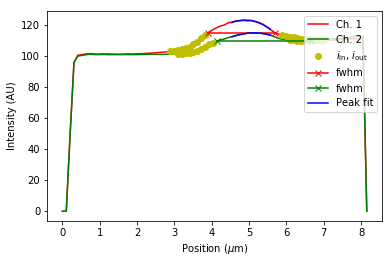

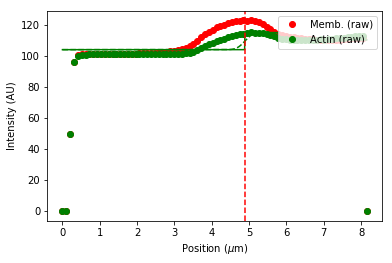

Thickness, center position of the cortical actin , cortical actin intensity (from fit) 0.8924872421259102 5.333260412368347 115.02082593152143
Thickness (min) 801.3797785344595 nm
Thickness (median) 1119.6722883314217 nm
Thickness (max) 19377.88517068542 nm
Ransac Slope =  1.276e-04
Regression Slope =  3.058e-04
Mean Thickness (After outlier removal) =  1.138 um


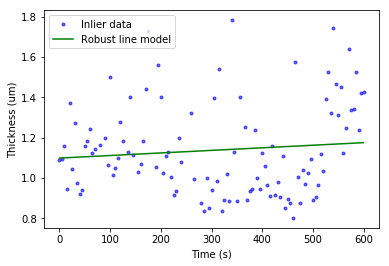

Loading BokehJS ...

block id 2
Time point: 0
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 6.31455127e+05  1.52823929e+01  3.79622050e+00 -1.63385168e+04]
Actin Fit: [ 27.673341     0.73855731   4.00319297 106.16168012]


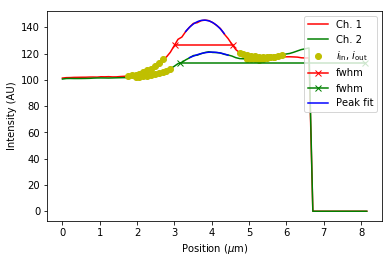

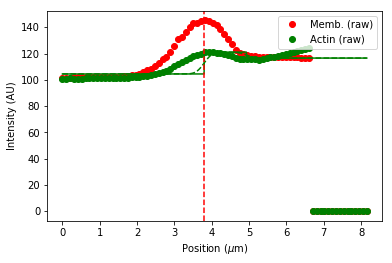

Thickness, center position of the cortical actin , cortical actin intensity (from fit) 1.1398524185206127 4.366146705472884 121.10983051612403


In [ ]:
%%time
#Fit all blocks

for i in range(0, totallength):
 print('block id', i+1)   
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 Thickness, Time = StripFit(Actin, Membrane, Time_unit, Xcalibration, Fitaround, psf, inisigmaguess, showaftertime)
 

   
 
 print("Thickness (min)",np.min(Thickness) *1000, "nm")
 print("Thickness (median)",np.median(Thickness) *1000, "nm")
 print("Thickness (max)",np.max(Thickness) *1000, "nm")
 Thickness_time = np.column_stack([Time, Thickness]) 

 show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = Time[-1], displayoutlier = False)
    
    

 hist, edges = np.histogram((Thickness), density=False, bins='auto')
 p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
 listedges = edges.tolist()
 listhist = hist.tolist()
 output_notebook()
 p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
 for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
 show(p)